<a href="https://colab.research.google.com/github/90148/week-1/blob/main/week_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`TABLE OF CONTACT`**

DATA

ANALYSIS

    Overall Vehicle Sales
    Yearly trend
    Vehicle class



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
os.getcwd()

'/content'

In [ ]:
# Use the path from the os.walk output in the first cell
ev_df=pd.read_csv('/content/EV_Dataset.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ev_df.head(2)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0


In [ ]:
ev_df.columns=ev_df.columns.str.lower()

In [ ]:
ev_df.shape

(96845, 8)

In [ ]:
ev_df.isnull().sum()

,0
year,0
month_name,0
date,0
state,0
vehicle_class,0
vehicle_category,0
vehicle_type,0
ev_sales_quantity,0


*Clean data with no nulls and hence no pre-processing is required for analysis.*

In [ ]:
ev_df['date'].min(),ev_df['date'].max()

('1/1/2014', '9/1/2023')

In [ ]:
ev_df['date']=pd.to_datetime(ev_df['date'])

In [ ]:
ev_df.query("date=='9/1/2023'")['year'].value_counts()

/tmp/ipython-input-2908258760.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  ev_df.query("date=='9/1/2023'")['year'].value_counts()


,count
year,
2023.0,859


In [ ]:
set(ev_df.query("year==2024")['month_name'])

{'jan'}

In [ ]:
ev_df.query("year==2024")['date'].max()

Timestamp('2024-01-01 00:00:00')

**ANALYSIS:**

***Overall Vehicle Sales***

In [ ]:
ev_df['ev_sales_quantity'].sum()

np.float64(3593811.0)

*Overall sales was 3.5M till 2024*

**Yearly Trends**

*How has the EV vehicle sale trend been over the years ?*

In [ ]:
set(ev_df['year'])

{2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0,
 2020.0,
 2021.0,
 2022.0,
 2023.0,
 2024.0}

In [ ]:
yearly_sales=ev_df.groupby('year')['ev_sales_quantity'].sum().reset_index()

In [ ]:
yearly_sales

,year,ev_sales_quantity
0,2014.0,2392.0
1,2015.0,7805.0
2,2016.0,49855.0
3,2017.0,87420.0
4,2018.0,130254.0
5,2019.0,166819.0
6,2020.0,124684.0
7,2021.0,331498.0
8,2022.0,1024723.0
9,2023.0,1525179.0


/tmp/ipython-input-336438872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_sales,x='year',y='ev_sales_quantity',palette=sns.color_palette("Paired"))
/tmp/ipython-input-336438872.py:2: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.barplot(data=yearly_sales,x='year',y='ev_sales_quantity',palette=sns.color_palette("Paired"))


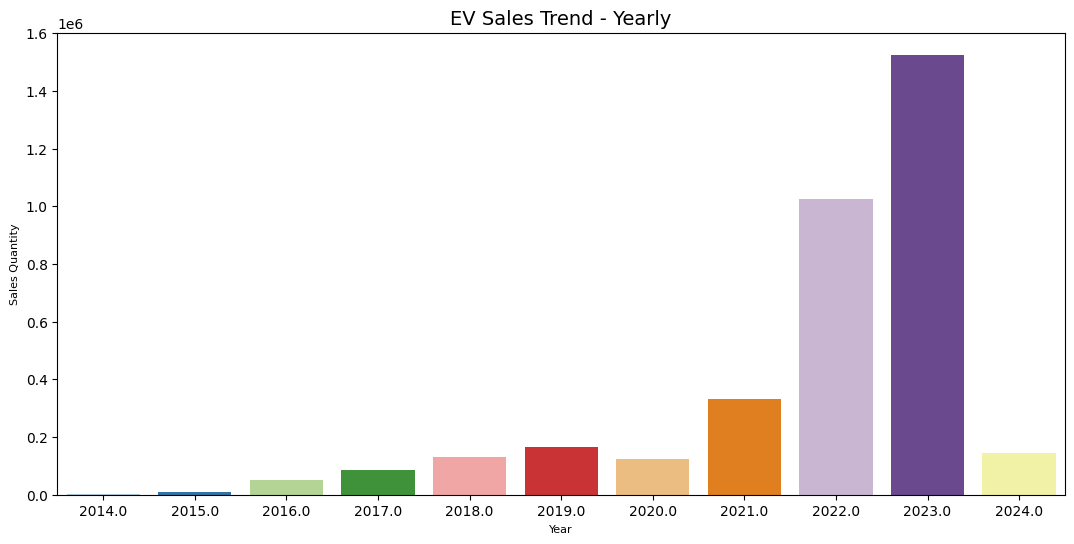

In [ ]:
plt.figure(figsize=(13,6))
sns.barplot(data=yearly_sales,x='year',y='ev_sales_quantity',palette=sns.color_palette("Paired"))
plt.title("EV Sales Trend - Yearly",size=14)
plt.xlabel('Year',size=8)
plt.ylabel('Sales Quantity',size=8)
plt.show()

*ev sales have been increasing over the years and in 2022 it crossed 1 M sales . For 2023 , the numbers were at 1.5M . 2024 data is not fully available yet.*

**Vehicle Class**

In [ ]:
ev_df.head(2)

,year,month_name,date,state,vehicle_class,vehicle_category,vehicle_type,ev_sales_quantity
0,2014.0,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0


In [ ]:
vehicle_class=ev_df.groupby('vehicle_class')['ev_sales_quantity'].sum().sort_values(ascending=False)[:20].reset_index()

In [ ]:
vehicle_class

,vehicle_class,ev_sales_quantity
0,M-CYCLE/SCOOTER,1697373.0
1,E-RICKSHAW(P),1408127.0
2,MOTOR CAR,130676.0
3,E-RICKSHAW WITH CART (G),90656.0
4,THREE WHEELER (PASSENGER),76132.0
5,MOPED,61253.0
6,THREE WHEELER (GOODS),44974.0
7,MOTORISED CYCLE (CC > 25CC),36390.0
8,MOTOR CAB,18681.0
9,MOTOR CYCLE/SCOOTER-USED FOR HIRE,11765.0


/tmp/ipython-input-3054190820.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot=sns.barplot(data=vehicle_class,x='vehicle_class',y='ev_sales_quantity',palette=sns.color_palette("Paired"))
/tmp/ipython-input-3054190820.py:2: UserWarning: 
The palette list has fewer values (12) than needed (20) and will cycle, which may produce an uninterpretable plot.
  bar_plot=sns.barplot(data=vehicle_class,x='vehicle_class',y='ev_sales_quantity',palette=sns.color_palette("Paired"))


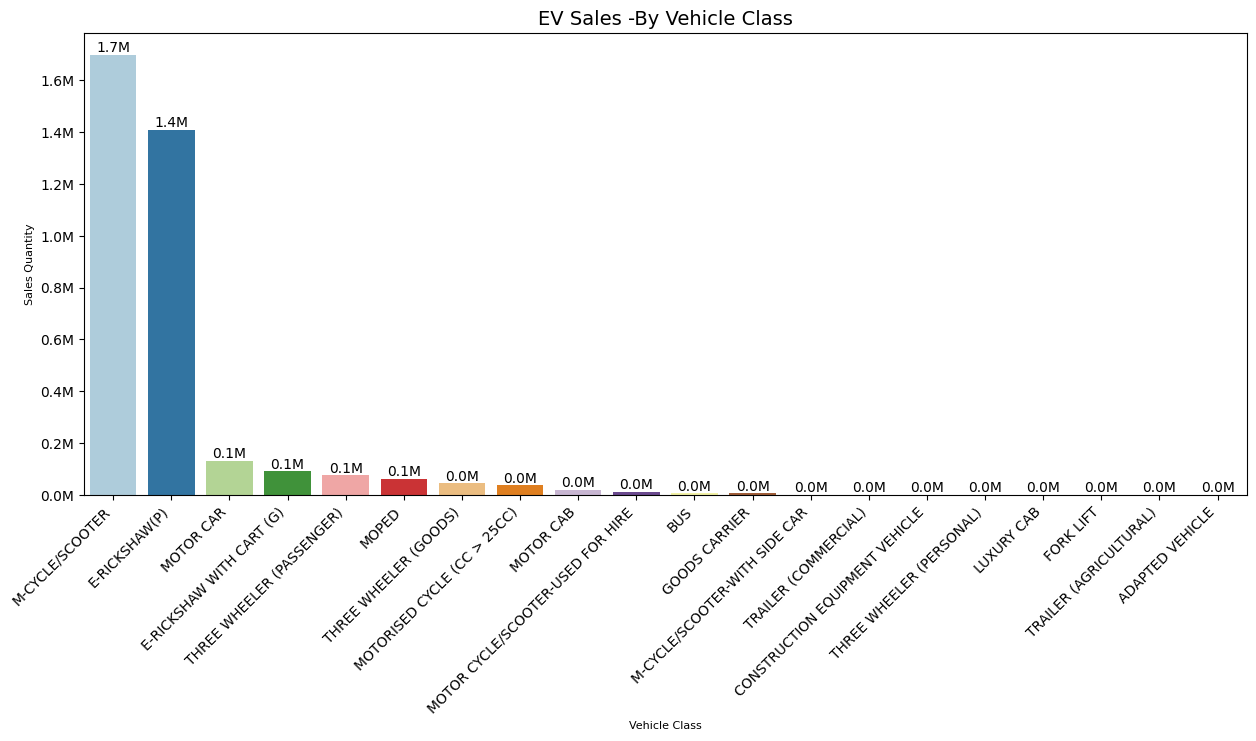

In [ ]:
plt.figure(figsize=(15,6))
bar_plot=sns.barplot(data=vehicle_class,x='vehicle_class',y='ev_sales_quantity',palette=sns.color_palette("Paired"))
#wrapped_labels = [textwrap.fill(label, width=10) for label in vehicle_class['vehicle_class']]
#plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels)
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:  f'{x/1000000:.1f}M'))
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()/1000000:.1f}M',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')

plt.title("EV Sales -By Vehicle Class",size=14)
plt.xlabel('Vehicle Class',size=8)
plt.ylabel('Sales Quantity',size=8)
plt.show()


*Scooters and passenger type E rickshaw are most sold e-vehicles in the category and the rest of the vehicle segment have had <0.1 M in sales.*